# Chapter 9

## Question 6

In which we investigate whether, for data just barely linearly separable, a linear SVM (an SVC) with a small penalty weight/cost that misclassifies a few training observations may perform better on test data than one with a huge penalty weight/cost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn.linear_model
# import sklearn.preprocessing
# import sklearn.pipeline
import sklearn.svm 
import sklearn.model_selection

sns.set(style="whitegrid")

### (a) Generate two-class data with p=2 in such a way that the classes are just barely linearly separable

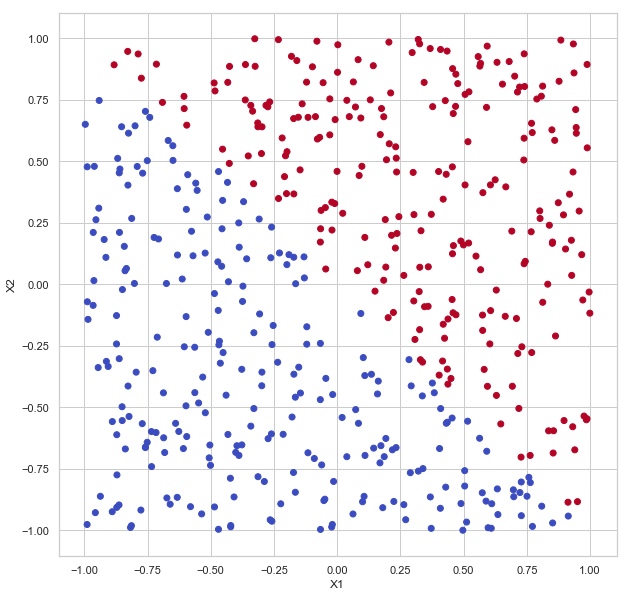

In [2]:
X1 = np.random.uniform(low=-1, high=+1, size=500)
X2 = np.random.uniform(low=-1, high=+1, size=500)

# linear threshold
Y = X1 + X2 > 0

df = pd.DataFrame({"X1": X1, "X2": X2, "Y": Y})

# delete a few points very near the threshold
df.drop(df[abs(df.X1 + df.X2) < 0.01].index, inplace=True)

fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter("X1", "X2", c="Y", data=df, cmap=plt.cm.coolwarm)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()


### (b) Compute the CV error rate for SVCs with a range of `cost` values. How many training points are misclassified, and how does this relate to the CV errors?

In [3]:
X = df.drop(columns="Y")
y = df.Y
for cost in [10**x for x in range(-5,4)]:
    linear_svm = sklearn.svm.LinearSVC(C=cost, max_iter=1e6)
    scores = sklearn.model_selection.cross_val_score(linear_svm, X, y, cv=5, scoring="f1")
    print(f"cross-validation score for C={cost}: {np.mean(scores)}")
    linear_svm.fit(X,y)
    y_pred = linear_svm.predict(X)
    print(f"Fraction misclassified for C={cost}: {sklearn.metrics.zero_one_loss(y, y_pred)}")
    print()

cross-validation score for C=1e-05: 0.9572476625410735
Fraction misclassified for C=1e-05: 0.03607214428857719

cross-validation score for C=0.0001: 0.9572476625410735
Fraction misclassified for C=0.0001: 0.038076152304609256

cross-validation score for C=0.001: 0.9619119372097236
Fraction misclassified for C=0.001: 0.04008016032064132

cross-validation score for C=0.01: 0.9725784710020534
Fraction misclassified for C=0.01: 0.024048096192384794

cross-validation score for C=0.1: 0.9937276180141075
Fraction misclassified for C=0.1: 0.004008016032064132

cross-validation score for C=1: 0.9937276180141075
Fraction misclassified for C=1: 0.004008016032064132

cross-validation score for C=10: 0.9979381443298969
Fraction misclassified for C=10: 0.0

cross-validation score for C=100: 0.9979381443298969
Fraction misclassified for C=100: 0.0

cross-validation score for C=1000: 0.9979381443298969
Fraction misclassified for C=1000: 0.0



High C means less tolerant of error - here increasing the amount we penalise misclassified points improves our overall model

### (c) Generate a test-set, and compute the test errors for each `cost`. Which value of `cost` minimises the test errors?

In [4]:
X1 = np.random.uniform(low=-1, high=+1, size=500)
X2 = np.random.uniform(low=-1, high=+1, size=500)

# linear threshold
Y = X1 + X2 > 0
testdf = pd.DataFrame({"X1": X1, "X2": X2, "Y": Y})

# delete a few points very near the threshold
testdf.drop(df[abs(df.X1 + df.X2) < 0.01].index, inplace=True)

X_test = testdf.drop(columns="Y")
y_test = testdf.Y

for cost in [10**x for x in range(-5,4)]:
    linear_svm = sklearn.svm.LinearSVC(C=cost, max_iter=1e6)
    linear_svm.fit(X,y)
    y_pred = linear_svm.predict(X_test)
    print(f"Test error for C={cost}: {sklearn.metrics.zero_one_loss(y_test, y_pred)}")
    print()

Test error for C=1e-05: 0.052000000000000046

Test error for C=0.0001: 0.050000000000000044

Test error for C=0.001: 0.04400000000000004

Test error for C=0.01: 0.03200000000000003

Test error for C=0.1: 0.016000000000000014

Test error for C=1: 0.008000000000000007

Test error for C=10: 0.0040000000000000036

Test error for C=100: 0.0040000000000000036

Test error for C=1000: 0.0020000000000000018



Test error is minimised for C=100/1000, though it's low for everything. This agrees with the CV-error, as I'd expect?

The conclusions of this test seem to disagree with what the authors want me to find! Perhaps I've misunderstood how they wanted the data to be generated.